In [ ]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 430.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.preprocessing import StandardScaler
import torch
import xgboost as xgb

In [ ]:
rice=pd.read_csv('/content/drive/MyDrive/CE 778 Project/CSISA_IND_LDS_Rice_2018_Data.csv')
iwd=pd.read_csv('/content/drive/MyDrive/CE 778 Project/ind_weather_data.csv')
sent1=pd.read_csv('/content/drive/MyDrive/CE 778 Project/sentinel1_rtc.csv')

<ipython-input-605-68f8fc39a887>:1: DtypeWarning: Columns (21,24,40,57,80,104,128,131,132,134,138,140,142,143,144,145,146,154,157,158,174,179,181,188) have mixed types. Specify dtype option on import or set low_memory=False.
  rice=pd.read_csv('/content/drive/MyDrive/CE 778 Project/CSISA_IND_LDS_Rice_2018_Data.csv')


In [ ]:
sent1

,min_vh,min_vv,max_vh,max_vv,range_vh,range_vv,mean_vh,mean_vv,std_vh,std_vv,ratio_vv_vh,rvi
0,0.017385,0.060882,0.026888,0.140586,0.009503,0.079703,0.023558,0.100390,0.003859,0.032968,4.261451,1.613224
1,0.028257,0.067528,0.046959,0.385458,0.018702,0.317929,0.035416,0.213123,0.007714,0.116242,6.017726,1.398587
2,0.014046,0.109842,0.036959,0.227815,0.022913,0.117973,0.023835,0.148228,0.009020,0.047469,6.218859,1.383226
3,0.008252,0.043973,0.032002,0.130546,0.023751,0.086573,0.019198,0.082648,0.008460,0.037227,4.305155,1.605115
4,0.020613,0.072212,0.050686,0.192163,0.030074,0.119951,0.030458,0.125695,0.011832,0.043465,4.126807,1.639630
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.019950,0.043302,0.045683,0.239150,0.025734,0.195848,0.034083,0.139841,0.008320,0.067402,4.102898,1.644559
1075,0.033731,0.087938,0.054504,0.304522,0.020773,0.216584,0.042216,0.161579,0.007052,0.081591,3.827387,1.707367
1076,0.020717,0.064354,0.040839,0.153236,0.020122,0.088882,0.030736,0.108606,0.007286,0.029397,3.533551,1.789406
1077,0.010344,0.057973,0.049277,0.124560,0.038933,0.066586,0.028329,0.092888,0.014792,0.022248,3.278862,1.877631


In [ ]:
iwd.duplicated().sum()

12

In [ ]:
#rice.drop(columns=['collectionDate'],inplace=True)

In [ ]:
missing=[]
for col in rice.columns:
  if rice[col].isnull().mean()>0.3:
    missing.append(col)

In [ ]:
len(missing)

124

In [ ]:
print(missing)

['D-otherPrevCrop', 'D-otherPrevCropTillage', 'D-q412_RotUseYear', 'D-q422_otherSeedSource', 'E-q5102_typeFYM', 'E-q5103_amtFYM', 'F-q5202_basalDAP', 'F-q5203_basalNPK', 'F-q5204_basalUrea', 'F-q5205_basalNPKS', 'F-q5206_basalMoP', 'F-q5207_basalSSP', 'F-q5208_basalTSP', 'F-q5209_basalZnSO4', 'F-q5210_basalGypsum', 'F-q5211_basalBoron', 'F-q52111_otherBasalFert', 'F-q52112_otherBasalFertAmt', 'F-q5212_1tdDAP', 'F-q5213_1appDaysDAP', 'F-q5214_1tdNPK', 'F-q5215_1appDaysNPK', 'F-q5218_1tdNPKS', 'F-q5219_1appDaysNPKS', 'F-q5220_1tdMoP', 'F-q5221_1appDaysMoP', 'F-q5223_1tdSSP', 'F-q5224_1appDaysSSP', 'F-q5225_1tdTSP', 'F-q5226_1appDaysTSP', 'F-q5227_1tdZnSO4', 'F-q5228_1appDaysZnSO4', 'F-q5229_1tdGypsum', 'F-q5230_1appDaysGypsum', 'F-q5231_1tdBoron', 'F-q5232_1appDaysBoron', 'F-q52321_1tdOtherFert', 'F-q52322_1tdOtherFertAmt', 'F-q52323_1appDaysOtherFert', 'F-q5233_2tdDAP', 'F-q5234_2appDaysDAP', 'F-q5235_2tdNPK', 'F-q5236_2appDaysNPK', 'F-q5239_2tdNPKS', 'F-q5240_2appDaysNPKS', 'F-q5241_2t

## Dropping columns with missing value more than 50%

In [ ]:
rice.drop(columns=missing,inplace=True)

In [ ]:
len(rice.columns)

94

In [ ]:
iwd

,latitude,longitude,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,sunshine_duration,daylight_duration
0,14.670,77.389,37.267002,16.617000,38.782295,17.030563,233.00000,233.00000,0,3.268457,9.434652,11.936570
1,14.670,77.390,37.280003,16.630000,38.800580,17.048231,233.00000,233.00000,0,3.141936,9.462577,11.920506
2,14.695,77.403,37.476498,16.926498,38.833855,17.415659,216.60000,216.60000,0,3.077419,9.342219,11.919545
3,14.694,77.403,37.482998,16.932999,38.842990,17.424454,216.60000,216.60000,0,3.097403,9.327998,11.913634
4,14.695,77.404,37.476498,16.926498,38.833855,17.415659,219.30002,219.30002,0,3.115385,9.335738,11.915322
...,...,...,...,...,...,...,...,...,...,...,...,...
1096,17.599,82.673,34.294502,16.444500,41.289417,16.694317,481.19998,481.19998,0,3.598291,9.558970,11.637048
1097,17.820,82.930,35.043003,13.193000,41.496260,12.063149,535.00000,535.00000,0,3.728682,9.304233,11.647946
1098,17.772,82.926,34.100500,17.400500,41.427803,16.545963,637.10000,637.10000,0,4.114754,9.316432,11.695726
1099,17.837,82.944,34.984500,16.434500,41.400078,16.396854,464.69998,464.69998,0,3.479339,9.461388,11.612305


In [ ]:
sent1

,min_vh,min_vv,max_vh,max_vv,range_vh,range_vv,mean_vh,mean_vv,std_vh,std_vv,ratio_vv_vh,rvi
0,0.017385,0.060882,0.026888,0.140586,0.009503,0.079703,0.023558,0.100390,0.003859,0.032968,4.261451,1.613224
1,0.028257,0.067528,0.046959,0.385458,0.018702,0.317929,0.035416,0.213123,0.007714,0.116242,6.017726,1.398587
2,0.014046,0.109842,0.036959,0.227815,0.022913,0.117973,0.023835,0.148228,0.009020,0.047469,6.218859,1.383226
3,0.008252,0.043973,0.032002,0.130546,0.023751,0.086573,0.019198,0.082648,0.008460,0.037227,4.305155,1.605115
4,0.020613,0.072212,0.050686,0.192163,0.030074,0.119951,0.030458,0.125695,0.011832,0.043465,4.126807,1.639630
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.019950,0.043302,0.045683,0.239150,0.025734,0.195848,0.034083,0.139841,0.008320,0.067402,4.102898,1.644559
1075,0.033731,0.087938,0.054504,0.304522,0.020773,0.216584,0.042216,0.161579,0.007052,0.081591,3.827387,1.707367
1076,0.020717,0.064354,0.040839,0.153236,0.020122,0.088882,0.030736,0.108606,0.007286,0.029397,3.533551,1.789406
1077,0.010344,0.057973,0.049277,0.124560,0.038933,0.066586,0.028329,0.092888,0.014792,0.022248,3.278862,1.877631


In [ ]:
print(rice.columns)

Index(['collectionDate', 'A-q102_state', 'A-q103_district',
       'A-q104_subDistrict', 'A-q105_village', 'A-q111_fGender', 'A-q112_fEdu',
       'A-q114_socialCategory', 'A-q116_crop', 'A-q117_season', 'C-q301_LLU',
       'C-q302_acreConv', 'C-q303_cultLand', 'C-q304_cropCultLand',
       'C-q305_cropLargestArea', 'C-q306_cropLarestAreaAcre',
       'C-q307_largestPlotType', 'D-q401_soilTexture', 'D-q402_drainClass',
       'D-q403_soilPerception', 'D-prevCrop', 'D-q404_prevCrop',
       'D-prevCropTillage', 'D-q405_prevCropTillage', 'D-q406_prevCropHarvest',
       'D-q407_cropResiduePcnt', 'D-q408_residueBurnt', 'D-q409_varType',
       'D-q410_varName', 'D-q411_LandPrep', 'D-q413_CropEst',
       'D-q414_rcNursEstDate', 'D-q415_seedingSowingTransDate',
       'D-q418_nursDetFactor', 'D-q419_transDetFactor', 'D-q420_cropSeedAmt',
       'D-q421_seedSource', 'E-q5105_statSHC', 'E-q5101_FYM',
       'E-q5104_applyMineralFert', 'F-basalFerts', 'F-firstTopDressFert',
       'F-q5216_1

In [ ]:
def columns_remover(rm_str,keep):
  col_to_drop=[]
  for c in rice.columns:
    if (rm_str in c) and (c not in keep):
      col_to_drop.append(c)
  return col_to_drop

##removing all A-xxx columns except season:

In [ ]:
col_A=[]
for c in rice.columns:
  if 'A-' in c and c!='A-q117_season':
    col_A.append(c)

In [ ]:
col_A

['A-q102_state',
 'A-q103_district',
 'A-q104_subDistrict',
 'A-q105_village',
 'A-q111_fGender',
 'A-q112_fEdu',
 'A-q114_socialCategory',
 'A-q116_crop']

In [ ]:
rice.drop(columns=col_A,inplace=True)

##Removing columns starting with C-XXX which are not relevant :

In [ ]:
col_C=columns_remover('C-',keep=['C-q303_cultLand','C-q304_cropCultLand','C-q305_cropLargestArea','C-q306_cropLarestAreaAcre'])
print(col_C)
rice.drop(columns=col_C,inplace=True)

['C-q301_LLU', 'C-q302_acreConv', 'C-q307_largestPlotType']


In [ ]:
col_C

['C-q301_LLU', 'C-q302_acreConv', 'C-q307_largestPlotType']

In [ ]:
#rice.drop(columns=col_C,inplace=True)

##Removing non relevant columns starting with D-XXX

<Axes: xlabel='D-q401_soilTexture'>

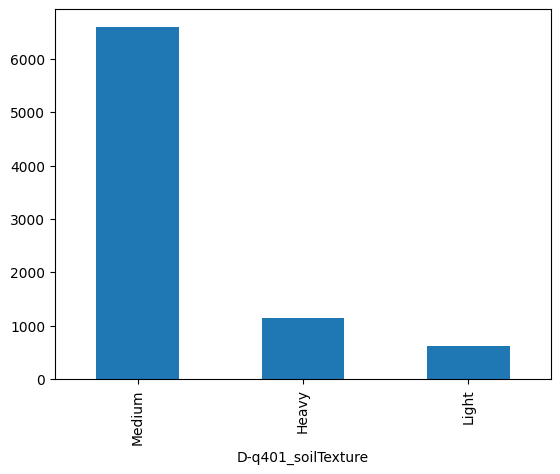

In [ ]:
rice['D-q401_soilTexture'].value_counts().plot(kind='bar')

In [ ]:
col_D=columns_remover('D-',keep=['D-q401_soilTexture','D-q402_drainClass','D-prevCrop','D-prevCropTillage','D-q407_cropResiduePcnt',
                                 'D-q420_cropSeedAmt',])
print(col_D)
rice.drop(columns=col_D,inplace=True)

['D-q403_soilPerception', 'D-q404_prevCrop', 'D-q405_prevCropTillage', 'D-q406_prevCropHarvest', 'D-q408_residueBurnt', 'D-q409_varType', 'D-q410_varName', 'D-q411_LandPrep', 'D-q413_CropEst', 'D-q414_rcNursEstDate', 'D-q415_seedingSowingTransDate', 'D-q418_nursDetFactor', 'D-q419_transDetFactor', 'D-q421_seedSource']


In [ ]:
#rice.drop(columns=col_D,inplace=True)

## Removing non relavant columns E-XXX

In [ ]:
col_E=columns_remover('E-',keep=['E-q5103_amtFYM','E-q5104_applyMineralFert'])
col_E

['E-q5105_statSHC', 'E-q5101_FYM']

In [ ]:
rice.drop(columns=col_E,inplace=True)

## Removing non relevant columns F-XXX

In [ ]:
F_info=pd.read_csv('/content/drive/MyDrive/CE 778 Project/F_col_info.csv',names=['a','b','c','d'])
dropf=F_info[F_info['c']=='Text']['a'].values

In [ ]:
for col in rice.columns:
  if col in dropf:
    rice.drop(columns=[col],inplace=True)

In [ ]:
rice.columns

Index(['collectionDate', 'A-q117_season', 'C-q303_cultLand',
       'C-q304_cropCultLand', 'C-q305_cropLargestArea',
       'C-q306_cropLarestAreaAcre', 'D-q401_soilTexture', 'D-q402_drainClass',
       'D-prevCrop', 'D-prevCropTillage', 'D-q407_cropResiduePcnt',
       'D-q420_cropSeedAmt', 'E-q5104_applyMineralFert', 'F-basalFerts',
       'F-q5216_1tdUrea', 'F-q5217_1appDaysUrea', 'F-q5237_2tdUrea',
       'F-q5238_2appDaysUrea', 'G-q5301_irrigAvail', 'G-q5302_irrigSource',
       'G-q5304_irrigGrthStage', 'G-q5305_irrigTimes', 'H-q5401_irrigDecision',
       'H-pumpUse', 'H-q5407_layFlatPipe', 'I-q5505_weedSeverity',
       'I-q5506_insectSeverity', 'I-q5507_insecticides', 'I-q5510_pesticides',
       'I-q5512_lodgingPercent', 'J-herbAppTimes', 'J-manualWeedTimes',
       'J-q5607_1manualWeeding', 'K-allWeeds', 'K-q5701_topTenWeeds',
       'K-q5702_top1stWeed', 'K-q5703_top2ndWeed', 'K-q5704_top3rdWeed',
       'K-q5705_top4thWeed', 'K-q5706_top5thWeed', 'L-q601_harvestDate',
    

In [ ]:
# col_F=columns_remover('F-',keep=[])
# col_F
# rice.drop(columns=col_F,inplace=True)

## Removing non relevant columns G-XXX

In [ ]:
col_G=columns_remover('G-',keep=['G-q5305_irrigTimes'])
col_G
rice.drop(columns=col_G,inplace=True)

## Removing H-XXX and I-XXX, J-XXX,K-XXX

In [ ]:
col_H=columns_remover('H-',keep=['H-q5405_tubewellDepthFeet','H-pumpUse',])
print(col_H)
rice.drop(columns=col_H,inplace=True)
col_I=columns_remover('I-',keep=['I-q5507_insecticides','I-q5510_pesticides','I-q5512_lodgingPercent',])
print(col_I)
rice.drop(columns=col_I,inplace=True)
col_J=columns_remover('J-',keep=['J-herbAppTimes','J-q5602_1herbAppDays','J-q5604_2herbAppDays','J-q5606_3herbAppDays',
                                 'J-manualWeedTimes','J-q5607_1manualWeeding','J-q5608_2manualWeeding','J-q5609_3manualWeeding'])
print(col_J)
rice.drop(columns=col_J,inplace=True)
col_K=columns_remover('K-',keep=[])
print(col_K)
rice.drop(columns=col_K,inplace=True)

['H-q5401_irrigDecision', 'H-q5407_layFlatPipe']
['I-q5505_weedSeverity', 'I-q5506_insectSeverity']
[]
['K-allWeeds', 'K-q5701_topTenWeeds', 'K-q5702_top1stWeed', 'K-q5703_top2ndWeed', 'K-q5704_top3rdWeed', 'K-q5705_top4thWeed', 'K-q5706_top5thWeed']


## Removing L-XXX

In [ ]:
col_L=columns_remover('L-',keep=['L-quintalPerAcre'])
print(col_L)
rice.drop(columns=col_L,inplace=True)

['L-q601_harvestDate', 'L-q602_harvestMethod', 'L-q604_threshing', 'L-q605_totalGrainYieldQUINTAL', 'L-q606_largestPlotYieldQUNITAL', 'L-tonPerHectare', 'L-q607_farmGatePrice', 'L-q608_fiveYearGProd']


## Removing M-XXX and O-XXX

In [ ]:
col_M=columns_remover('M-',keep=[])
print(col_M)
rice.drop(columns=col_M,inplace=True)
col_O=columns_remover('O-',keep=['O-largestPlotGPS-Altitude'])
print(col_O)
rice.drop(columns=col_O,inplace=True)

['M-q701_hhMember', 'M-q702_hhMemAg', 'M-q703_marketSaleShare', 'M-q704_agIncomeShare', 'M-q705_cropShareAg', 'M-q706_cropSP', 'M-q707_cropAvgSP', 'M-q708_marketDistance']
['O-largestPlotGPS-Accuracy']


In [ ]:
#rice.drop(columns=['Latitude','Longitude'],inplace=True)

In [ ]:
rice.to_csv('/content/drive/MyDrive/CE 778 Project/rice_processed1.csv',index=False)

In [ ]:
rice.drop(columns='collectionDate',inplace=True)

In [ ]:
d={}
for col in rice.columns:
  if rice[col].dtype=='O':
    d[col]=len(rice[col].unique())


In [ ]:
S=pd.Series(d)
S

A-q117_season                 5
D-q401_soilTexture            3
D-q402_drainClass             4
D-prevCrop                   22
D-prevCropTillage           137
E-q5104_applyMineralFert      2
F-basalFerts                123
H-pumpUse                     3
I-q5507_insecticides          3
I-q5510_pesticides            3
dtype: int64

In [ ]:
rice.drop(columns=['D-prevCrop','D-prevCropTillage','F-basalFerts'],inplace=True)

In [ ]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   A-q117_season              8355 non-null   object 
 1   C-q303_cultLand            8355 non-null   float64
 2   C-q304_cropCultLand        8355 non-null   float64
 3   C-q305_cropLargestArea     8355 non-null   float64
 4   C-q306_cropLarestAreaAcre  8355 non-null   float64
 5   D-q401_soilTexture         8355 non-null   object 
 6   D-q402_drainClass          8355 non-null   object 
 7   D-q407_cropResiduePcnt     6613 non-null   float64
 8   D-q420_cropSeedAmt         8355 non-null   float64
 9   E-q5104_applyMineralFert   8355 non-null   object 
 10  F-q5216_1tdUrea            6907 non-null   float64
 11  F-q5217_1appDaysUrea       6905 non-null   float64
 12  F-q5237_2tdUrea            6494 non-null   float64
 13  F-q5238_2appDaysUrea       6493 non-null   float

In [ ]:
categorical=[]
for col in rice.columns:
  if rice[col].dtype=='O':
    categorical.append(col)

In [ ]:
categorical

['A-q117_season',
 'D-q401_soilTexture',
 'D-q402_drainClass',
 'E-q5104_applyMineralFert',
 'H-pumpUse',
 'I-q5507_insecticides',
 'I-q5510_pesticides']

##India weather data

In [ ]:
iwd.isnull().mean()

latitude                    0.0
longitude                   0.0
temperature_2m_max          0.0
temperature_2m_min          0.0
apparent_temperature_max    0.0
apparent_temperature_min    0.0
precipitation_sum           0.0
rain_sum                    0.0
snowfall_sum                0.0
precipitation_hours         0.0
sunshine_duration           0.0
daylight_duration           0.0
dtype: float64

In [ ]:
iwd['snowfall_sum'].value_counts()

snowfall_sum
0    1101
Name: count, dtype: int64

In [ ]:
iwd.drop(columns=['snowfall_sum'],inplace=True)

In [ ]:
iwd.to_csv('/content/drive/MyDrive/CE 778 Project/iwd_processed.csv',index=False)

## sentinal1.csv

In [ ]:
sent1

,min_vh,min_vv,max_vh,max_vv,range_vh,range_vv,mean_vh,mean_vv,std_vh,std_vv,ratio_vv_vh,rvi
0,0.017385,0.060882,0.026888,0.140586,0.009503,0.079703,0.023558,0.100390,0.003859,0.032968,4.261451,1.613224
1,0.028257,0.067528,0.046959,0.385458,0.018702,0.317929,0.035416,0.213123,0.007714,0.116242,6.017726,1.398587
2,0.014046,0.109842,0.036959,0.227815,0.022913,0.117973,0.023835,0.148228,0.009020,0.047469,6.218859,1.383226
3,0.008252,0.043973,0.032002,0.130546,0.023751,0.086573,0.019198,0.082648,0.008460,0.037227,4.305155,1.605115
4,0.020613,0.072212,0.050686,0.192163,0.030074,0.119951,0.030458,0.125695,0.011832,0.043465,4.126807,1.639630
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,0.019950,0.043302,0.045683,0.239150,0.025734,0.195848,0.034083,0.139841,0.008320,0.067402,4.102898,1.644559
1075,0.033731,0.087938,0.054504,0.304522,0.020773,0.216584,0.042216,0.161579,0.007052,0.081591,3.827387,1.707367
1076,0.020717,0.064354,0.040839,0.153236,0.020122,0.088882,0.030736,0.108606,0.007286,0.029397,3.533551,1.789406
1077,0.010344,0.057973,0.049277,0.124560,0.038933,0.066586,0.028329,0.092888,0.014792,0.022248,3.278862,1.877631


## Using complete data:

In [ ]:
rice.to_csv('/content/drive/MyDrive/CE 778 Project/rice_processed1.csv',index=False)

In [ ]:
len(rice.columns)

26

##Merging the data

In [ ]:
d1=pd.read_csv('/content/drive/MyDrive/CE 778 Project/iwd_processed.csv')
d2=pd.read_csv('/content/drive/MyDrive/CE 778 Project/rice_processed1.csv')
d3=pd.read_csv('/content/drive/MyDrive/CE 778 Project/sentinel1_rtc.csv')

In [ ]:
len(d2.columns)

26

In [ ]:
d1.columns

Index(['latitude', 'longitude', 'temperature_2m_max', 'temperature_2m_min',
       'apparent_temperature_max', 'apparent_temperature_min',
       'precipitation_sum', 'rain_sum', 'precipitation_hours',
       'sunshine_duration', 'daylight_duration'],
      dtype='object')

In [ ]:
column_name_mapping = {
    'Latitude': 'latitude',
    'Longitude': 'longitude',
    # Add more mappings as needed
}
d2.rename(columns=column_name_mapping, inplace=True)

In [ ]:
len(d1)

1101

In [ ]:
len(d2)

8355

In [ ]:
d1.drop_duplicates(subset=['latitude', 'longitude'],inplace=True)


In [ ]:
d2.drop_duplicates(subset=['latitude', 'longitude'],inplace=True)

In [ ]:
len(d2)

6746

In [ ]:
d1.duplicated().sum()

0

In [ ]:
d2.drop_duplicates(inplace=True)

In [ ]:
d2.duplicated().sum()

0

In [ ]:
final_df=pd.merge(d2, d1, on=['latitude', 'longitude'], how='inner')
final_df

,A-q117_season,C-q303_cultLand,C-q304_cropCultLand,C-q305_cropLargestArea,C-q306_cropLarestAreaAcre,D-q401_soilTexture,D-q402_drainClass,D-q407_cropResiduePcnt,D-q420_cropSeedAmt,E-q5104_applyMineralFert,...,O-largestPlotGPS-Altitude,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,precipitation_hours,sunshine_duration,daylight_duration
0,Kharif,3.0,3.0,3.0,3.0,Medium,MediumLand,10.0,30.0,yes,...,346.883606,37.267002,16.617000,38.782295,17.030563,233.00000,233.00000,3.268457,9.434652,11.936570
1,Kharif,3.0,3.0,3.0,3.0,Medium,MediumLand,10.0,30.0,yes,...,378.864624,37.280003,16.630000,38.800580,17.048231,233.00000,233.00000,3.141936,9.462577,11.920506
2,Kharif,3.0,3.0,3.0,3.0,Medium,MediumLand,10.0,30.0,yes,...,321.666626,37.476498,16.926498,38.833855,17.415659,216.60000,216.60000,3.077419,9.342219,11.919545
3,Kharif,3.0,3.0,3.0,3.0,Medium,MediumLand,10.0,30.0,yes,...,333.353760,37.482998,16.932999,38.842990,17.424454,216.60000,216.60000,3.097403,9.327998,11.913634
4,Kharif,3.0,3.0,3.0,3.0,Medium,MediumLand,10.0,30.0,yes,...,330.737549,37.476498,16.926498,38.833855,17.415659,219.30002,219.30002,3.115385,9.335738,11.915322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,Kharif,1.5,1.5,1.5,1.5,Medium,LowLand,5.0,45.0,yes,...,-52.477108,34.701500,20.551500,41.256870,21.418188,1097.40000,1097.40000,6.728000,8.271986,12.474716
843,Kharif,2.5,1.5,0.7,0.7,Medium,LowLand,60.0,25.0,yes,...,5.657461,34.294502,16.444500,41.289417,16.694317,481.19998,481.19998,3.598291,9.558970,11.637048
844,Kharif,5.0,3.0,3.0,3.0,Medium,MediumLand,10.0,90.0,yes,...,-30.225555,35.043003,13.193000,41.496260,12.063149,535.00000,535.00000,3.728682,9.304233,11.647946
845,Kharif,2.0,1.0,1.0,1.0,Medium,MediumLand,10.0,30.0,no,...,-35.924377,34.100500,17.400500,41.427803,16.545963,637.10000,637.10000,4.114754,9.316432,11.695726


In [ ]:
with open('/content/drive/MyDrive/CE 778 Project/row_index_skipped_sentinel1.txt','r') as f:
  lines=f.read().split('\n')

In [ ]:
d2[['latitude','longitude']].duplicated().sum()

1609

In [ ]:
len(lines)

22

In [ ]:
index=lines[1:]
index=[int(i) for i in index]

In [ ]:
d1.drop(index,inplace=True)

In [ ]:
d2.drop(index,inplace=True)

In [ ]:
len(index)

21

In [ ]:
len(d1)

1080

In [ ]:
final_rows=len(d3)

In [ ]:
d1_f=d1.head(final_rows).reset_index()
d2_f=d2.head(final_rows).reset_index()
d3_f=d3.head(final_rows).reset_index()

In [ ]:
d3_f.duplicated().sum()

0

In [ ]:
len(d1_f)

1079

In [ ]:
# final_df=pd.concat([d1_f,d2_f,d3_f],axis=1).drop(columns=['index','latitude','longitude','rain_sum'])

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   A-q117_season              847 non-null    object 
 1   C-q303_cultLand            847 non-null    float64
 2   C-q304_cropCultLand        847 non-null    float64
 3   C-q305_cropLargestArea     847 non-null    float64
 4   C-q306_cropLarestAreaAcre  847 non-null    float64
 5   D-q401_soilTexture         847 non-null    object 
 6   D-q402_drainClass          847 non-null    object 
 7   D-q407_cropResiduePcnt     847 non-null    float64
 8   D-q420_cropSeedAmt         847 non-null    float64
 9   E-q5104_applyMineralFert   847 non-null    object 
 10  F-q5216_1tdUrea            657 non-null    float64
 11  F-q5217_1appDaysUrea       657 non-null    float64
 12  F-q5237_2tdUrea            672 non-null    float64
 13  F-q5238_2appDaysUrea       672 non-null    float64

## converting categorical columns to one hot encodings:

In [ ]:
final_df1=pd.get_dummies(final_df,columns=categorical)

In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   C-q303_cultLand                847 non-null    float64
 1   C-q304_cropCultLand            847 non-null    float64
 2   C-q305_cropLargestArea         847 non-null    float64
 3   C-q306_cropLarestAreaAcre      847 non-null    float64
 4   D-q407_cropResiduePcnt         847 non-null    float64
 5   D-q420_cropSeedAmt             847 non-null    float64
 6   F-q5216_1tdUrea                657 non-null    float64
 7   F-q5217_1appDaysUrea           657 non-null    float64
 8   F-q5237_2tdUrea                672 non-null    float64
 9   F-q5238_2appDaysUrea           672 non-null    float64
 10  G-q5305_irrigTimes             715 non-null    float64
 11  I-q5512_lodgingPercent         847 non-null    float64
 12  J-herbAppTimes                 847 non-null    flo

## imputing missing values using KNN imputer

In [ ]:
# Perform KNN Imputation
imputer = KNNImputer(n_neighbors=5)
final_df2 = imputer.fit_transform(final_df1)
# Replace df with the imputed data
final_df2 = pd.DataFrame(final_df2, columns=final_df1.columns)

In [ ]:
# final_df2=final_df.fillna('mean')

In [ ]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   C-q303_cultLand                847 non-null    float64
 1   C-q304_cropCultLand            847 non-null    float64
 2   C-q305_cropLargestArea         847 non-null    float64
 3   C-q306_cropLarestAreaAcre      847 non-null    float64
 4   D-q407_cropResiduePcnt         847 non-null    float64
 5   D-q420_cropSeedAmt             847 non-null    float64
 6   F-q5216_1tdUrea                847 non-null    float64
 7   F-q5217_1appDaysUrea           847 non-null    float64
 8   F-q5237_2tdUrea                847 non-null    float64
 9   F-q5238_2appDaysUrea           847 non-null    float64
 10  G-q5305_irrigTimes             847 non-null    float64
 11  I-q5512_lodgingPercent         847 non-null    float64
 12  J-herbAppTimes                 847 non-null    flo

In [ ]:
final_df2

,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,precipitation_hours,sunshine_duration,daylight_duration,C-q303_cultLand,C-q304_cropCultLand,...,D-q402_drainClass_Upland,D-q402_drainClass_VeryLowLand,E-q5104_applyMineralFert_no,E-q5104_applyMineralFert_yes,H-pumpUse_no,H-pumpUse_yes,I-q5507_insecticides_no,I-q5507_insecticides_yes,I-q5510_pesticides_no,I-q5510_pesticides_yes
0,37.267002,16.617000,38.782295,17.030563,233.00000,3.268457,9.434652,11.936570,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,37.280003,16.630000,38.800580,17.048231,233.00000,3.141936,9.462577,11.920506,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37.476498,16.926498,38.833855,17.415659,216.60000,3.077419,9.342219,11.919545,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,37.482998,16.932999,38.842990,17.424454,216.60000,3.097403,9.327998,11.913634,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,37.476498,16.926498,38.833855,17.415659,219.30002,3.115385,9.335738,11.915322,3.0,3.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,34.701500,20.551500,41.256870,21.418188,1097.40000,6.728000,8.271986,12.474716,1.5,1.5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1075,34.294502,16.444500,41.289417,16.694317,481.19998,3.598291,9.558970,11.637048,2.5,1.5,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1076,35.043003,13.193000,41.496260,12.063149,535.00000,3.728682,9.304233,11.647946,5.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1077,34.100500,17.400500,41.427803,16.545963,637.10000,4.114754,9.316432,11.695726,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
X=final_df2.drop(columns=['L-quintalPerAcre'])
y=final_df2['L-quintalPerAcre']

In [ ]:
X=X.drop(columns=['latitude','longitude'])

<Axes: xlabel='L-quintalPerAcre', ylabel='Density'>

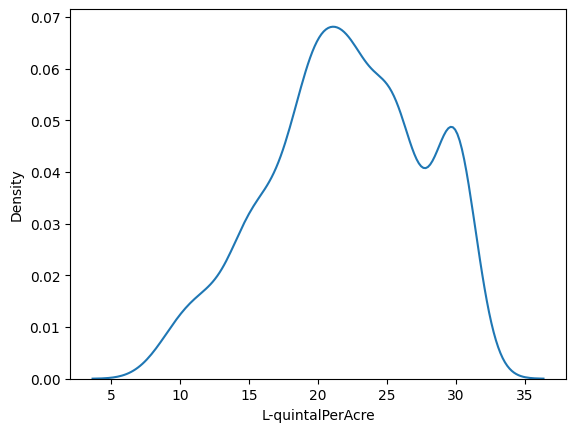

In [ ]:
import seaborn as sns
sns.kdeplot(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define XGBoost regressor model
xgb_reg = xgb.XGBRegressor(
    n_estimators=200,  # Number of trees
    max_depth=4,
    learning_rate=0.05,# Limit the maximum depth of trees
    min_child_weight=5,  # Minimum sum of instance weight needed in a child node
    gamma=0.2,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.6,  # Subsample ratio of the training instances
    colsample_bytree=0.6,  # Subsample ratio of columns when constructing each tree
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=0.5,  # L2 regularization term on weights
    random_state=42,  # Random state for reproducibility
    n_jobs=-1,  # Number of parallel threads (-1 means using all processors)
)

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_reg.predict(X_train)
y_pred_test = xgb_reg.predict(X_test)
# Calculate mean squared error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)
print('R2 score train :', r2_score(y_train,y_pred_train))
print('R2 score test :', r2_score(y_test,y_pred_test))

Mean Squared Error: 15.741942048838078
R2 score train : 0.8833348069726711
R2 score test : 0.46269630542155515


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Define Random Forest regressor model
from sklearn.ensemble import RandomForestRegressor
#rf_reg = RandomForestRegressor(n_estimators=100,)
# Random Forest Regressor with good hyperparameters
rf_reg = RandomForestRegressor(
    n_estimators=1000,  # Number of trees
    max_depth=20,  # Maximum depth of the trees (no limit)
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=3,  # Minimum number of samples required for a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    bootstrap=True,  # Whether to use bootstrap samples
    oob_score=True,  # Whether to use out-of-bag samples for estimation
    random_state=42,  # Random state for reproducibility
    n_jobs=-1,
    max_samples=0.7,
    max_leaf_nodes=100
)
# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_reg.predict(X_train)
y_pred_test = rf_reg.predict(X_test)
# Calculate mean squared error (MSE) as an evaluation metric
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)
print('R2 score train :', r2_score(y_train,y_pred_train))
print('R2 score test :', r2_score(y_test,y_pred_test))

Mean Squared Error: 15.405996559476783
R2 score train : 0.7579369924876964
R2 score test : 0.4741627910718509


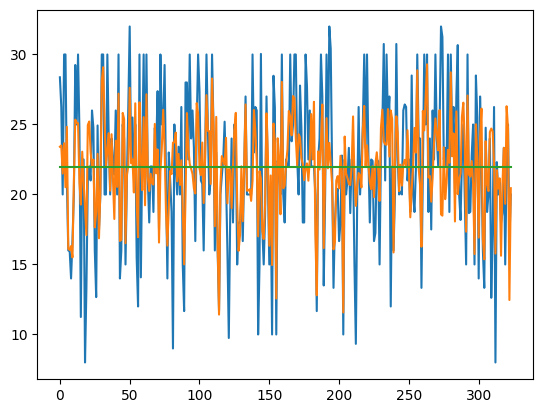

In [ ]:

plt.plot(np.arange(len(y_pred_test)),y_test)
plt.plot(np.arange(len(y_pred_test)),y_pred_test)
plt.plot(np.arange(len(y_pred_test)),np.mean(y_test.values)*np.ones(len(y_test)))

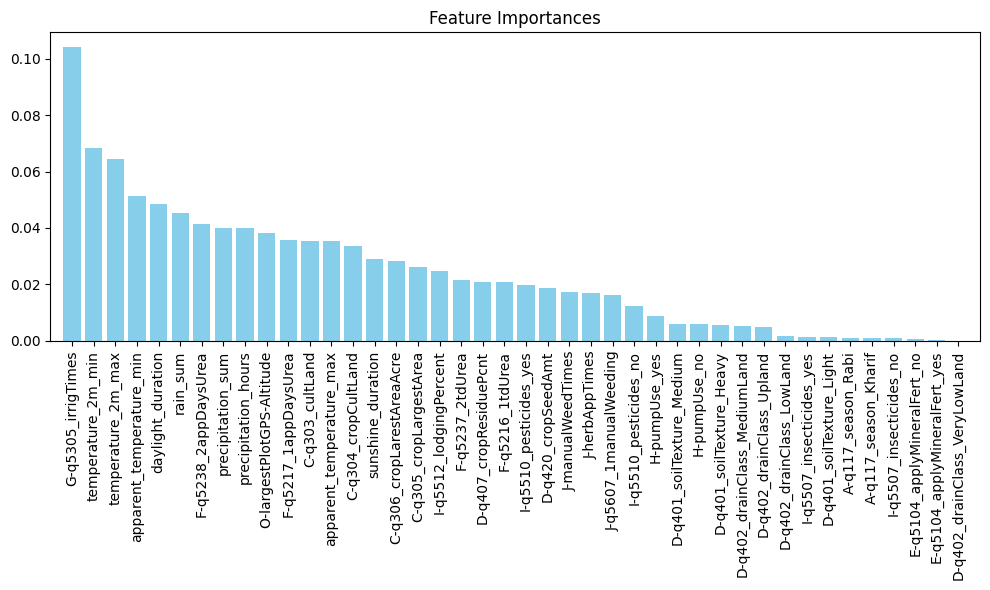

In [ ]:
importances = rf_reg.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]
# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [ ]:
len(importances)

46

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create the TabNet regressor
clf = TabNetRegressor(
    n_d=64,  # Number of decision prediction vectors
    n_a=64,  # Number of attention vectors
    n_steps=5,  # Number of decision steps
    gamma=1.5,  # Relaxation parameter for the attention module
    n_independent=2,  # Number of independent coefficients in the GLU
    n_shared=2,  # Number of shared coefficients in the GLU
    lambda_sparse=1e-3,  # Strength of the sparsity regularization
    cat_idxs=[],  # List of categorical feature indices
    cat_dims=[],  # Number of categories for each categorical feature
    cat_emb_dim=1,  # Embedding dimension for categorical features
    seed=42,  # Seed for reproducibility
)
# Train the model
clf.fit(
    X_train=X_train_scaled,
    y_train=y_train.values.reshape(-1,1),
    eval_set=[(X_test_scaled,y_test.values.reshape(-1,1))],
    max_epochs=100,  # Maximum number of epochs
    patience=50,  # Early stopping patience
    batch_size=128,  # Batch size
    virtual_batch_size=128,  # Virtual batch size
    num_workers=0,  # Number of workers for data loading
    drop_last=False,  # Whether to drop the last batch if it's incomplete
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 421.87394| val_0_mse: 245.59052|  0:00:00s
epoch 1  | loss: 117.8396| val_0_mse: 480.34599|  0:00:00s
epoch 2  | loss: 62.41747| val_0_mse: 277.45965|  0:00:01s
epoch 3  | loss: 35.40605| val_0_mse: 66.97871|  0:00:01s
epoch 4  | loss: 30.68588| val_0_mse: 56.18514|  0:00:01s
epoch 5  | loss: 30.43187| val_0_mse: 72.1786 |  0:00:02s
epoch 6  | loss: 31.21121| val_0_mse: 61.47401|  0:00:02s
epoch 7  | loss: 30.26931| val_0_mse: 65.0827 |  0:00:02s
epoch 8  | loss: 29.37751| val_0_mse: 54.08156|  0:00:03s
epoch 9  | loss: 25.81319| val_0_mse: 32.77447|  0:00:03s
epoch 10 | loss: 26.21791| val_0_mse: 32.62996|  0:00:04s
epoch 11 | loss: 25.14802| val_0_mse: 27.77794|  0:00:04s
epoch 12 | loss: 24.80891| val_0_mse: 26.21088|  0:00:05s
epoch 13 | loss: 22.3268 | val_0_mse: 37.24724|  0:00:05s
epoch 14 | loss: 23.51082| val_0_mse: 30.9103 |  0:00:06s
epoch 15 | loss: 23.59597| val_0_mse: 25.88902|  0:00:06s
epoch 16 | loss: 22.24114| val_0_mse: 29.3393 |  0:00:06s
epoch 17 |

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
predictions = clf.predict(X_test_scaled)

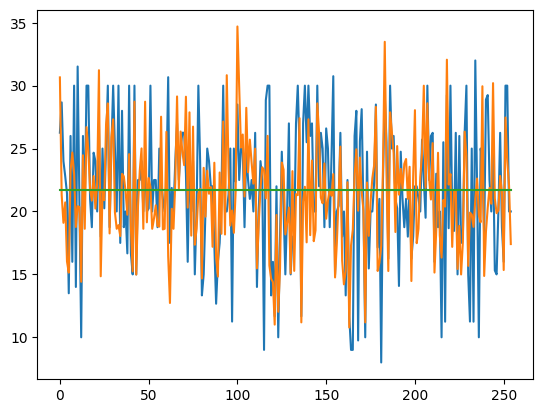

In [ ]:
plt.plot(np.arange(len(predictions)),y_test)
plt.plot(np.arange(len(predictions)),predictions)
plt.plot(np.arange(len(predictions)),np.mean(y_test.values)*np.ones(len(y_test)))


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define the architecture of the ANN
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define a callback to monitor MSE and R2 score on validation data
class MetricsCallback(keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        X_val, y_val = self.validation_data
        y_pred = self.model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val, y_pred)
        print(f'Validation MSE: {mse}, R2 Score: {r2}')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[MetricsCallback((X_test, y_test))])

# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


Epoch 1/500
8/8 [==============================] - 0s 3ms/step
Validation MSE: 96.46089239442901, R2 Score: -2.2924015159670867
19/19 [==============================] - 2s 37ms/step - loss: 274.3851 - val_loss: 96.4609
Epoch 2/500
8/8 [==============================] - 0s 2ms/step
Validation MSE: 47.922404662878584, R2 Score: -0.6356866896450362
19/19 [==============================] - 1s 63ms/step - loss: 68.5667 - val_loss: 47.9224
Epoch 3/500
8/8 [==============================] - 0s 2ms/step
Validation MSE: 43.52503214551039, R2 Score: -0.4855956467044962
19/19 [==============================] - 0s 18ms/step - loss: 45.4491 - val_loss: 43.5250
Epoch 4/500
8/8 [==============================] - 0s 3ms/step
Validation MSE: 46.99524483587823, R2 Score: -0.6040408864165348
19/19 [==============================] - 0s 18ms/step - loss: 41.2153 - val_loss: 46.9952
Epoch 5/500
8/8 [==============================] - 0s 3ms/step
Validation MSE: 28.697197772860896, R2 Score: 0.020507740431901

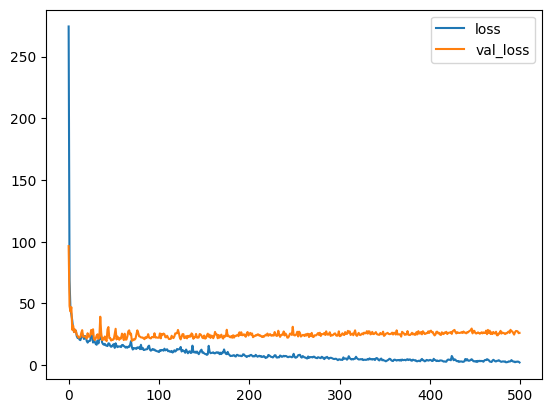

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
r2_score(predictions.reshape(len(predictions),),y_test.values)

0.0773177760804451

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest regressor
rf_reg = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best R2 score
print("Best R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


KeyboardInterrupt: 

In [673]:
x=pd.read_csv('/content/drive/MyDrive/CE 778 Project/CSISA_IND_LDS_Rice_2018_Data.csv')

<ipython-input-673-f299f7bec48a>:1: DtypeWarning: Columns (21,24,40,57,80,104,128,131,132,134,138,140,142,143,144,145,146,154,157,158,174,179,181,188) have mixed types. Specify dtype option on import or set low_memory=False.
  x=pd.read_csv('/content/drive/MyDrive/CE 778 Project/CSISA_IND_LDS_Rice_2018_Data.csv')


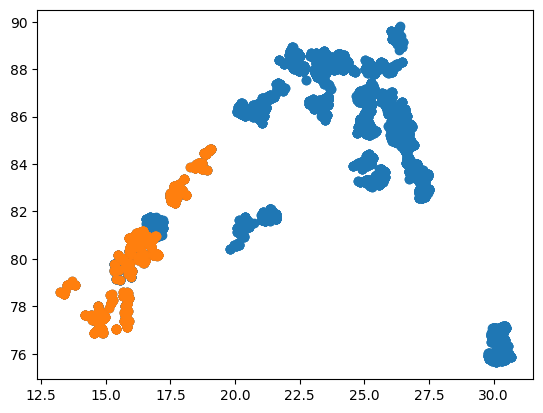

In [680]:
plt.scatter(x['Latitude'],x['Longitude'])
plt.scatter(d1['latitude'],d1['longitude'])

In [681]:
x['Latitude']

0       14.670
1       14.670
2       14.695
3       14.694
4       14.695
         ...  
8350    25.787
8351    25.760
8352    25.760
8353    25.777
8354    25.523
Name: Latitude, Length: 8355, dtype: float64